In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

## Этап 1. Построение свёрточной нейронной сети для распознавания объектов из базы данных MNIST
Cоздание свёрточного мультиклассового классификатора изображений цифр из набора данных
MNIST.

In [ ]:
from tensorflow.keras.datasets import mnist

# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Форма обучающих данных:", x_train.shape)
print("Форма меток обучения:", y_train.shape)
print("Форма тестовых данных:", x_test.shape)
print("Форма тестовых меток:", y_test.shape)

# Нормализация данных
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Добавление размерности канала (для grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("\nПосле преобразования:")
print("Форма обучающих данных:", x_train.shape)
print("Форма тестовых данных:", x_test.shape)

# Преобразование меток в one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("Форма y_train после one-hot:", y_train.shape)
print("Форма y_test после one-hot:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Форма обучающих данных: (60000, 28, 28)
Форма меток обучения: (60000,)
Форма тестовых данных: (10000, 28, 28)
Форма тестовых меток: (10000,)

После преобразования:
Форма обучающих данных: (60000, 28, 28, 1)
Форма тестовых данных: (10000, 28, 28, 1)
Форма y_train после one-hot: (60000, 10)
Форма y_test после one-hot: (10000, 10)


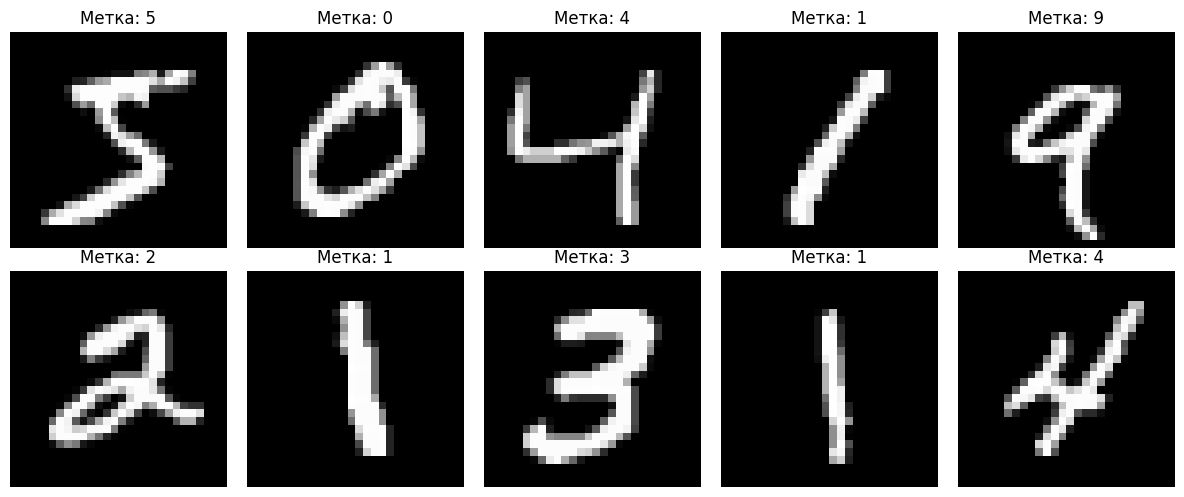

In [ ]:
# Визуализация
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Метка: {np.argmax(y_train[i])}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Параметры согласно варианту 20
conv_layers = 3
filters = [32, 32, 32]   # Количество карт признаков на слое
kernel_size = (5, 5)

model = keras.Sequential()

model.add(layers.Input(shape=(28, 28, 1)))
# Сверточные слои
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))

# Скрытый полносвязный слой
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))  # Добавляем Dropout для регуляризации

# Выходной слой
model.add(layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,274 (481.54 KB)

 Trainable params: 123,274 (481.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Компиляция модели
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

print("Размеры данных для обучения:")
print("x_train_split:", x_train_split.shape)
print("y_train_split:", y_train_split.shape)
print("x_val_split:", x_val_split.shape)
print("y_val_split:", y_val_split.shape)

Размеры данных для обучения:
x_train_split: (48000, 28, 28, 1)
y_train_split: (48000, 10)
x_val_split: (12000, 28, 28, 1)
y_val_split: (12000, 10)


In [ ]:

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,  # Восстановление весов лучшей модели
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# Обучение модели
history = model.fit(
    x_train_split, y_train_split,
    batch_size=128,
    epochs=50,
    validation_data=(x_val_split, y_val_split),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7893 - loss: 0.6438 - val_accuracy: 0.9817 - val_loss: 0.0659 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9770 - loss: 0.0730 - val_accuracy: 0.9861 - val_loss: 0.0493 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9854 - loss: 0.0475 - val_accuracy: 0.9866 - val_loss: 0.0463 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9894 - loss: 0.0357 - val_accuracy: 0.9842 - val_loss: 0.0504 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9902 - loss: 0.0309 - val_accuracy: 0.9873 - val_loss: 0.0402 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9921 - loss: 0.0246 - val_accuracy: 0.9893 - val_loss: 0.0388 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9936 - loss: 0.0195 - 

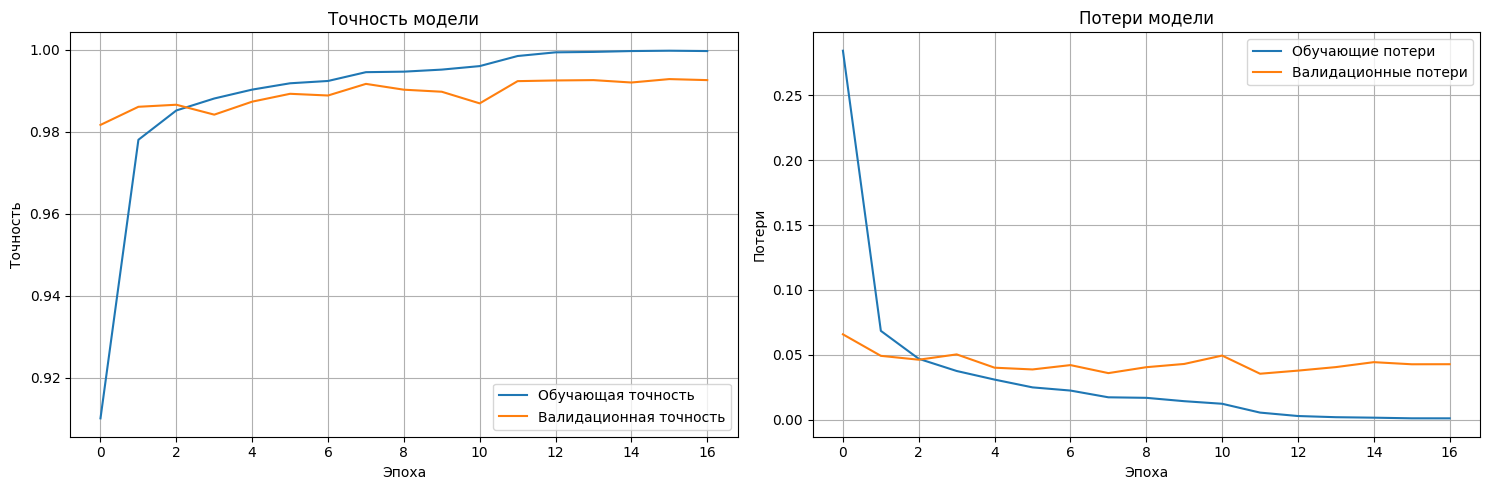

In [ ]:
# Визуализация результатов обучения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


ax1.plot(history.history['accuracy'], label='Обучающая точность')
ax1.plot(history.history['val_accuracy'], label='Валидационная точность')
ax1.set_title('Точность модели')
ax1.set_xlabel('Эпоха')
ax1.set_ylabel('Точность')
ax1.legend()
ax1.grid(True)


ax2.plot(history.history['loss'], label='Обучающие потери')
ax2.plot(history.history['val_loss'], label='Валидационные потери')
ax2.set_title('Потери модели')
ax2.set_xlabel('Эпоха')
ax2.set_ylabel('Потери')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### Предсказание на новых данных

In [ ]:
# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nРезультаты на тестовых данных:")
print(f"Точность: {test_accuracy:.4f}")
print(f"Потери: {test_loss:.4f}")


Результаты на тестовых данных:
Точность: 0.9939
Потери: 0.0236


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


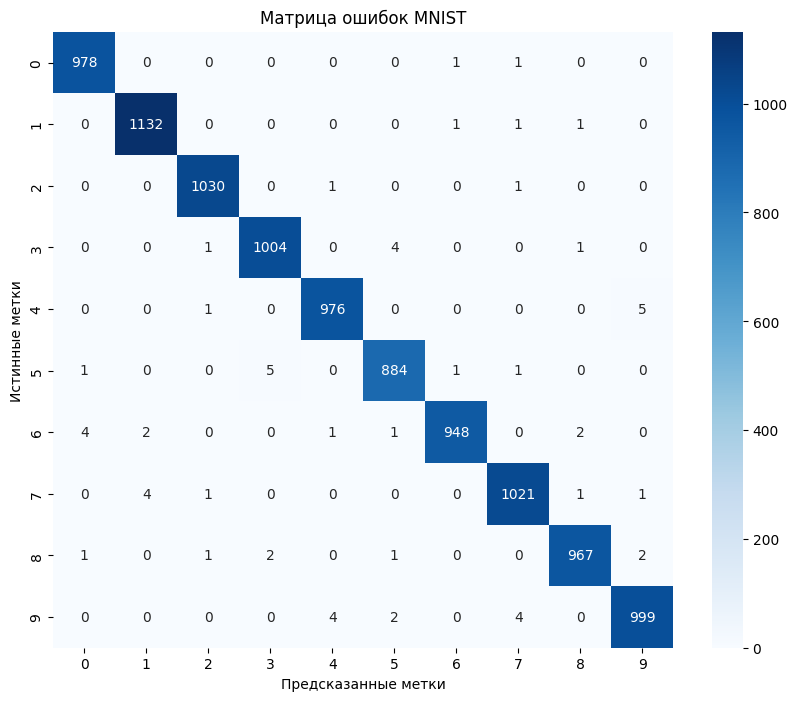

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Матрица ошибок MNIST')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

### Сравнение с базовой моделью

In [ ]:
# Параметры базовой сети
base_conv_layers = 2
base_filters = [32, 64]
base_kernel_size = (3, 3)
base_hidden_neurons = [64]

# Создание базовой модели
base_model = keras.Sequential()

# Добавление сверточных слоев
base_model.add(layers.Input(shape=(28, 28, 1)))

for i in range(base_conv_layers):
    base_model.add(layers.Conv2D(base_filters[i], base_kernel_size, activation='relu'))
    base_model.add(layers.MaxPooling2D(pool_size=(2, 2)))


base_model.add(layers.Flatten())

# Добавление скрытого полносвязного слоя
base_model.add(layers.Dense(base_hidden_neurons[0], activation='relu'))
base_model.add(layers.Dropout(0.3))


base_model.add(layers.Dense(10, activation='softmax'))


base_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


print("Архитектура базовой модели:")
base_model.summary()

Архитектура базовой модели:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
base_early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

base_reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# Обучение базовой модели
print("\nОбучение базовой модели...")
base_history = base_model.fit(
    x_train_split, y_train_split,
    batch_size=128,
    epochs=30,
    validation_data=(x_val_split, y_val_split),
    callbacks=[base_early_stopping, base_reduce_lr],
    verbose=1
)


Обучение базовой модели...
Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7702 - loss: 0.7259 - val_accuracy: 0.9728 - val_loss: 0.0877 - learning_rate: 0.0010
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9621 - loss: 0.1241 - val_accuracy: 0.9809 - val_loss: 0.0627 - learning_rate: 0.0010
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9746 - loss: 0.0857 - val_accuracy: 0.9827 - val_loss: 0.0561 - learning_rate: 0.0010
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9784 - loss: 0.0701 - val_accuracy: 0.9875 - val_loss: 0.0457 - learning_rate: 0.0010
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9824 - loss: 0.0596 - val_accuracy: 0.9883 - val_loss: 0.0405 - learning_rate: 0.0010
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9844 - loss: 0.0504 - val_accuracy: 0.9893 - val_loss: 0.0399 - learning_rate: 0.0010
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accura

СРАВНЕНИЕ РЕЗУЛЬТАТОВ

РАЗНИЦА:
Улучшение точности: +0.0019
Улучшение потерь: +0.0050


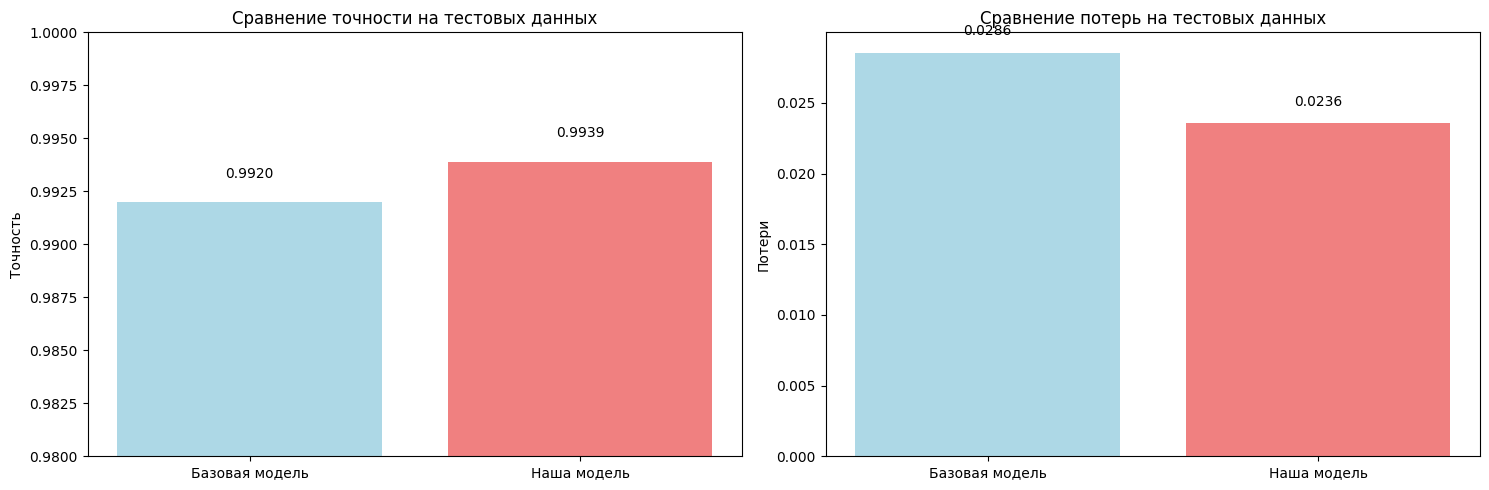

In [ ]:
# Оценка базовой модели на тестовых данных
base_test_loss, base_test_accuracy = base_model.evaluate(x_test, y_test, verbose=0)

print("=" * 60)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print("=" * 60)

print("\nРАЗНИЦА:")
accuracy_diff = test_accuracy - base_test_accuracy
loss_diff = base_test_loss - test_loss  # Обратная разница, так как меньшие потери лучше

print(f"Улучшение точности: {accuracy_diff:+.4f}")
print(f"Улучшение потерь: {loss_diff:+.4f}")

# Визуализация сравнения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Сравнение точности
models = ['Базовая модель', 'Наша модель']
accuracies = [base_test_accuracy, test_accuracy]
losses = [base_test_loss, test_loss]

bars1 = ax1.bar(models, accuracies, color=['lightblue', 'lightcoral'])
ax1.set_title('Сравнение точности на тестовых данных')
ax1.set_ylabel('Точность')
ax1.set_ylim(0.98, 1.0)

# Добавление значений на столбцы
for bar, acc in zip(bars1, accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{acc:.4f}', ha='center', va='bottom')

# Сравнение потерь
bars2 = ax2.bar(models, losses, color=['lightblue', 'lightcoral'])
ax2.set_title('Сравнение потерь на тестовых данных')
ax2.set_ylabel('Потери')

# Добавление значений на столбцы
for bar, loss in zip(bars2, losses):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{loss:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Этап 2. Построение бинарного классификатора
Создание бинарного
классификатора изображений кошек и собак из набора данных Cats vs. Dogs.

In [ ]:
import tensorflow_datasets as tfds

# Загрузка датасета
print("Загрузка датасета Cats vs Dogs...")

(raw_train, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
    shuffle_files=True
)


train_size = int(0.8 * len(raw_train))
raw_train_final = raw_train.take(train_size)
raw_val_final = raw_train.skip(train_size)

print(f"Обучающая выборка: {len(raw_train_final)} изображений")
print(f"Валидационная выборка: {len(raw_val_final)} изображений")
print(f"Тестовая выборка: {len(raw_test)} изображений")

# Функция для предобработки изображений
def preprocess_image(image, label):
    # Изменение размера до 220x220
    image = tf.image.resize(image, [220, 220])
    # Нормализация пикселей к диапазону [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Применение предобработки и создание батчей
train_dataset_final = raw_train_final.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_final = raw_val_final.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset_final = raw_test.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)

print("Датасет готов к использованию!")

Загрузка датасета Cats vs Dogs...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.5FOYAN_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Обучающая выборка: 13026 изображений
Валидационная выборка: 3257 изображений
Тестовая выборка: 6979 изображений
Датасет готов к использованию!


In [ ]:
# Параметры согласно варианту 20
input_size = (220, 220, 3)
conv_layers = 4
filters = [32, 32, 64, 128]
kernel_size = (5, 5)
hidden_layers = 1
hidden_neurons = [512]

model_cats_dogs = keras.Sequential()


model_cats_dogs.add(layers.Input(shape=input_size))


for i in range(conv_layers):
    model_cats_dogs.add(layers.Conv2D(filters[i], kernel_size,
                                     activation='relu'))
    # Добавляем MaxPooling после каждого сверточного слоя, кроме последнего
    if i < conv_layers - 1:
        model_cats_dogs.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Слои для извлечения признаков
model_cats_dogs.add(layers.GlobalAveragePooling2D())


for neurons in hidden_neurons:
    model_cats_dogs.add(layers.Dense(neurons, activation='relu'))
    model_cats_dogs.add(layers.Dropout(0.5))

# Выходной слой (бинарная классификация)
model_cats_dogs.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model_cats_dogs.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


print("Архитектура модели для Cats vs Dogs:")
model_cats_dogs.summary()

Архитектура модели для Cats vs Dogs:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 216, 216, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 108, 108, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 104, 104, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 48, 48, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 20, 20, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350,817 (1.34 MB)

 Trainable params: 350,817 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

print("Начало обучения модели Cats vs Dogs...")

# Обучение модели
history_cats_dogs = model_cats_dogs.fit(
    train_dataset_final,
    epochs=40,
    validation_data=val_dataset_final,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Начало обучения модели Cats vs Dogs...
Epoch 1/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 52s 104ms/step - accuracy: 0.5174 - loss: 0.6930 - val_accuracy: 0.5284 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 2/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 35s 85ms/step - accuracy: 0.6031 - loss: 0.6659 - val_accuracy: 0.6141 - val_loss: 0.6546 - learning_rate: 0.0010
Epoch 3/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - accuracy: 0.6499 - loss: 0.6265 - val_accuracy: 0.6844 - val_loss: 0.5909 - learning_rate: 0.0010
Epoch 4/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.6850 - loss: 0.5955 - val_accuracy: 0.6236 - val_loss: 0.6346 - learning_rate: 0.0010
Epoch 5/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 36s 87ms/step - accuracy: 0.7060 - loss: 0.5698 - val_accuracy: 0.7700 - val_loss: 0.4838 - learning_rate: 0.0010
Epoch 6/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 35s 86ms/step - accuracy: 0.7563 - loss: 0.5063 - val_accuracy: 0.8081 - val_loss: 0.4242 - learning_rate: 0.0010
Epoch 7/40
408/408 ━━━━━━━━━━━━━━━━━

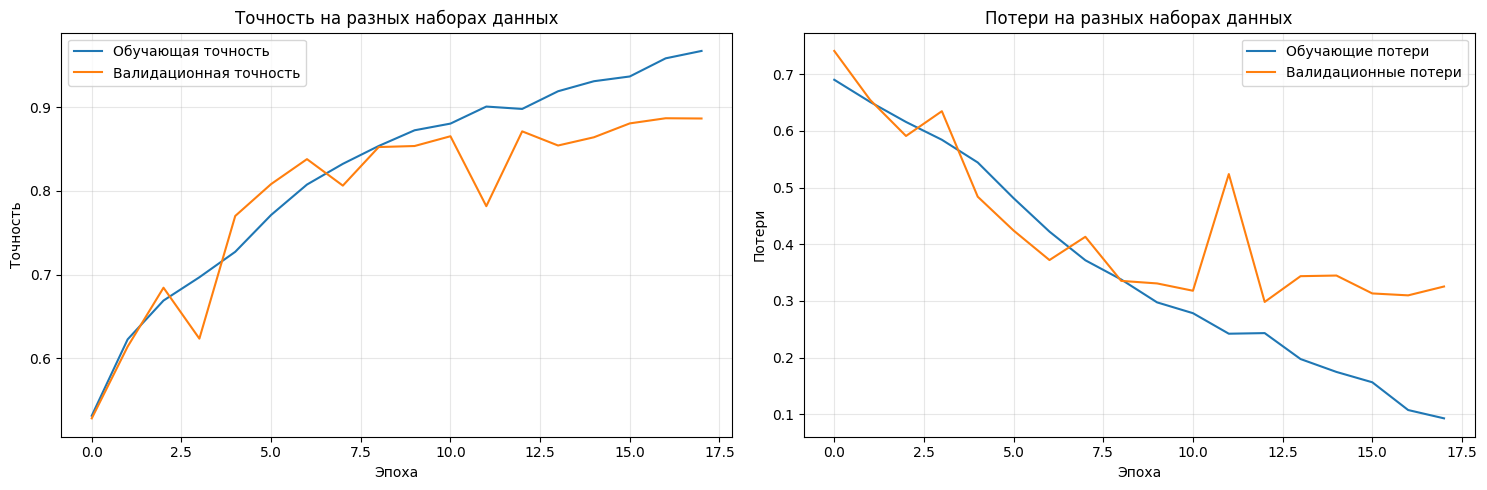

In [ ]:
# Графики обучения
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cats_dogs.history['accuracy'], label='Обучающая точность')
plt.plot(history_cats_dogs.history['val_accuracy'], label='Валидационная точность')
plt.title('Точность на разных наборах данных')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_cats_dogs.history['loss'], label='Обучающие потери')
plt.plot(history_cats_dogs.history['val_loss'], label='Валидационные потери')
plt.title('Потери на разных наборах данных')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Предсказания на новых данных

In [ ]:
# Оценка на тестовых данных
test_loss, test_accuracy = model_cats_dogs.evaluate(test_dataset_final, verbose=0)

print(f"Точность на тестовых данных: {test_accuracy:.4f}")
print(f"Потери на тестовых данных: {test_loss:.4f}")

Точность на тестовых данных: 0.8682
Потери на тестовых данных: 0.3042


Визуализация предсказаний на тестовых данных:


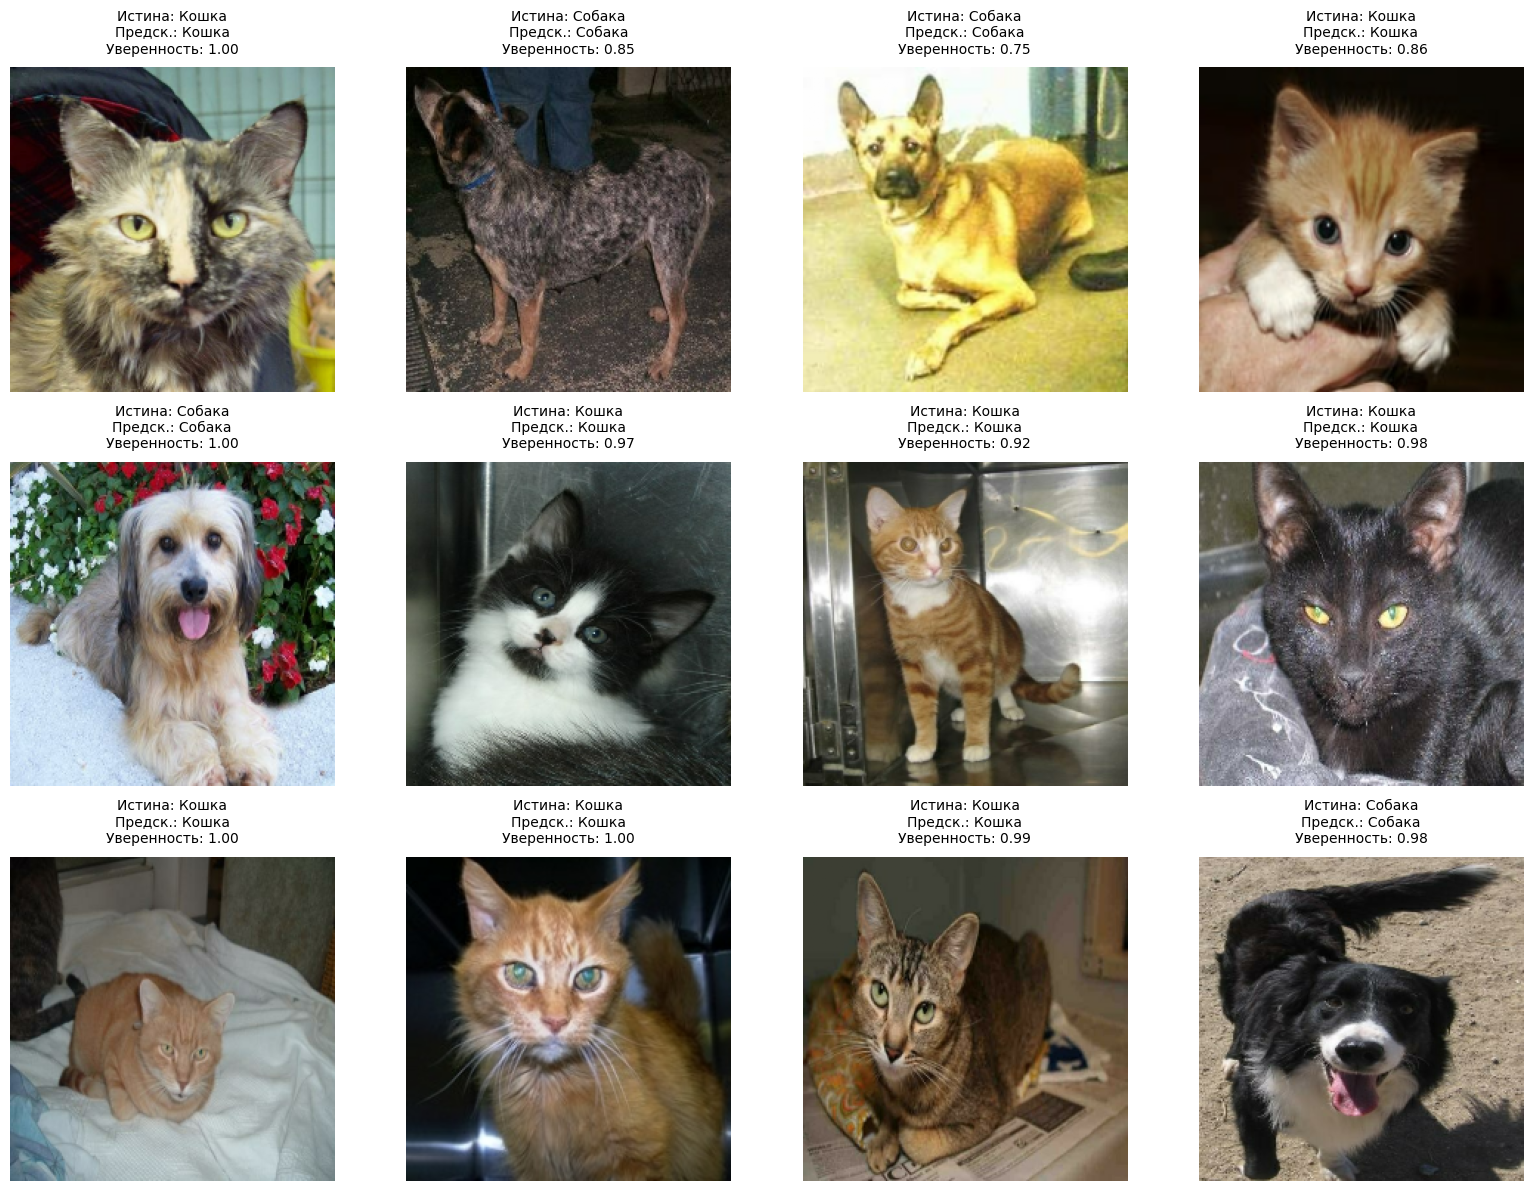

Точность на этом батче: 87.50% (28/32)


In [ ]:
# Функция для визуализации предсказаний на тестовом наборе
def visualize_test_predictions(dataset, model, num_examples=12):
    for images, labels in dataset.take(1):
        predictions = model.predict(images, verbose=0)
        predictions = predictions.flatten()

        fig, axes = plt.subplots(3, 4, figsize=(16, 12))
        axes = axes.flat

        for i in range(min(num_examples, len(images))):
            true_label = "Собака" if labels[i] == 1 else "Кошка"
            pred_prob = predictions[i]
            pred_label = "Собака" if pred_prob > 0.5 else "Кошка"
            confidence = pred_prob if pred_prob > 0.5 else 1 - pred_prob

            axes[i].imshow(images[i])

            axes[i].set_title(f'Истина: {true_label}\nПредск.: {pred_label}\nУверенность: {confidence:.2f}',
                            fontsize=10, pad=10)
            axes[i].axis('off')


        plt.tight_layout()
        plt.show()

        correct_predictions = sum(1 for true, pred in zip(labels, predictions)
                                if (pred > 0.5) == (true == 1))
        total_predictions = len(labels)
        batch_accuracy = correct_predictions / total_predictions

        print(f"Точность на этом батче: {batch_accuracy:.2%} ({correct_predictions}/{total_predictions})")

print("Визуализация предсказаний на тестовых данных:")
visualize_test_predictions(test_dataset_final, model_cats_dogs)


all_test_preds = []
all_test_labels = []

for images, labels in test_dataset_final:
    preds = model_cats_dogs.predict(images, verbose=0)
    all_test_preds.extend(preds.flatten())
    all_test_labels.extend(labels.numpy())

binary_test_preds = [1 if pred > 0.5 else 0 for pred in all_test_preds]

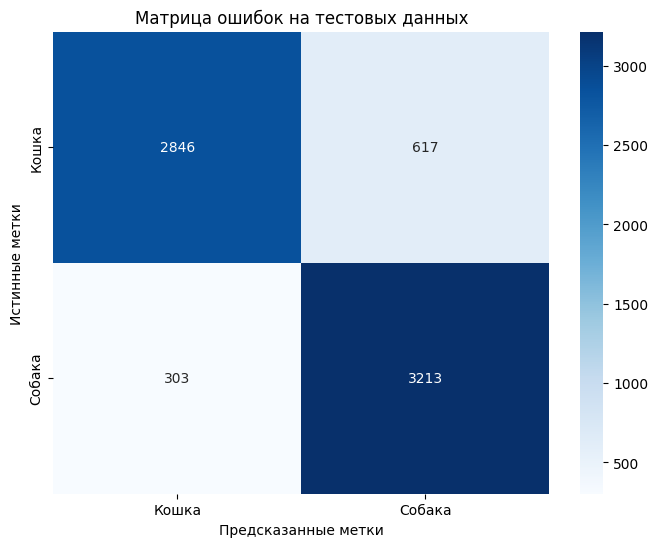

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(all_test_labels, binary_test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Кошка', 'Собака'],
            yticklabels=['Кошка', 'Собака'])
plt.title('Матрица ошибок на тестовых данных')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()


### Сравнение с базовой моделью классификации

In [ ]:
# Параметры базовой сети
base_input_size = (150, 150, 3)
base_conv_layers = 4
base_filters = [32, 64, 128, 128]
base_kernel_size = (3, 3)
base_hidden_neurons = [512]

# Создание базовой модели
base_model_cats_dogs = keras.Sequential()


base_model_cats_dogs.add(layers.Input(shape=base_input_size))


def preprocess_for_base_model(image, label):
    image = tf.image.resize(image, [150, 150])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


base_train_dataset = raw_train_final.map(preprocess_for_base_model).batch(32).prefetch(tf.data.AUTOTUNE)
base_val_dataset = raw_val_final.map(preprocess_for_base_model).batch(32).prefetch(tf.data.AUTOTUNE)
base_test_dataset = raw_test.map(preprocess_for_base_model).batch(32).prefetch(tf.data.AUTOTUNE)


for i in range(base_conv_layers):
    base_model_cats_dogs.add(layers.Conv2D(base_filters[i], base_kernel_size,
                                          activation='relu'))
    if i < base_conv_layers - 1:
        base_model_cats_dogs.add(layers.MaxPooling2D(pool_size=(2, 2)))


base_model_cats_dogs.add(layers.GlobalAveragePooling2D())

base_model_cats_dogs.add(layers.Dense(base_hidden_neurons[0], activation='relu'))
base_model_cats_dogs.add(layers.Dropout(0.5))

base_model_cats_dogs.add(layers.Dense(1, activation='sigmoid'))


base_model_cats_dogs.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Архитектура базовой модели Cats vs Dogs:")
base_model_cats_dogs.summary()

Архитектура базовой модели Cats vs Dogs:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,393 (1.17 MB)

 Trainable params: 307,393 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучение базовой модели
print("\nОбучение базовой модели...")
base_history = base_model_cats_dogs.fit(
    base_train_dataset,
    epochs=40,
    validation_data=base_val_dataset,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Обучение базовой модели...
Epoch 1/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.5436 - loss: 0.6841 - val_accuracy: 0.6153 - val_loss: 0.6401 - learning_rate: 0.0010
Epoch 2/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - accuracy: 0.6391 - loss: 0.6385 - val_accuracy: 0.7049 - val_loss: 0.5698 - learning_rate: 0.0010
Epoch 3/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - accuracy: 0.6966 - loss: 0.5883 - val_accuracy: 0.7356 - val_loss: 0.5304 - learning_rate: 0.0010
Epoch 4/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - accuracy: 0.7217 - loss: 0.5531 - val_accuracy: 0.7446 - val_loss: 0.5198 - learning_rate: 0.0010
Epoch 5/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 48s 91ms/step - accuracy: 0.7523 - loss: 0.5188 - val_accuracy: 0.7762 - val_loss: 0.4853 - learning_rate: 0.0010
Epoch 6/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.7644 - loss: 0.4920 - val_accuracy: 0.7455 - val_loss: 0.5079 - learning_rate: 0.0010
Epoch 7/40
408/408 ━━━━━━━━━━━━━━━━━━━━ 36s 89ms

In [ ]:
# Оценка базовой модели на тестовых данных
base_test_loss, base_test_accuracy = base_model_cats_dogs.evaluate(base_test_dataset, verbose=0)


НАША МОДЕЛЬ (Вариант 20):
Размер изображения: 220x220
Архитектура: 4 сверт. слоев, фильтры [32, 32, 64, 128]
Ядро свертки: 5x5
Скрытые слои: 1 слоя с 512 нейронами
Точность на тесте: 0.8682
Потери на тесте: 0.3042

БАЗОВАЯ МОДЕЛЬ:
Размер изображения: 150x150
Архитектура: 4 сверт. слоя, фильтры [32, 64, 128, 128]
Ядро свертки: 3x3
Скрытые слои: 1 слой с 512 нейронами
Точность на тесте: 0.8981
Потери на тесте: 0.3144


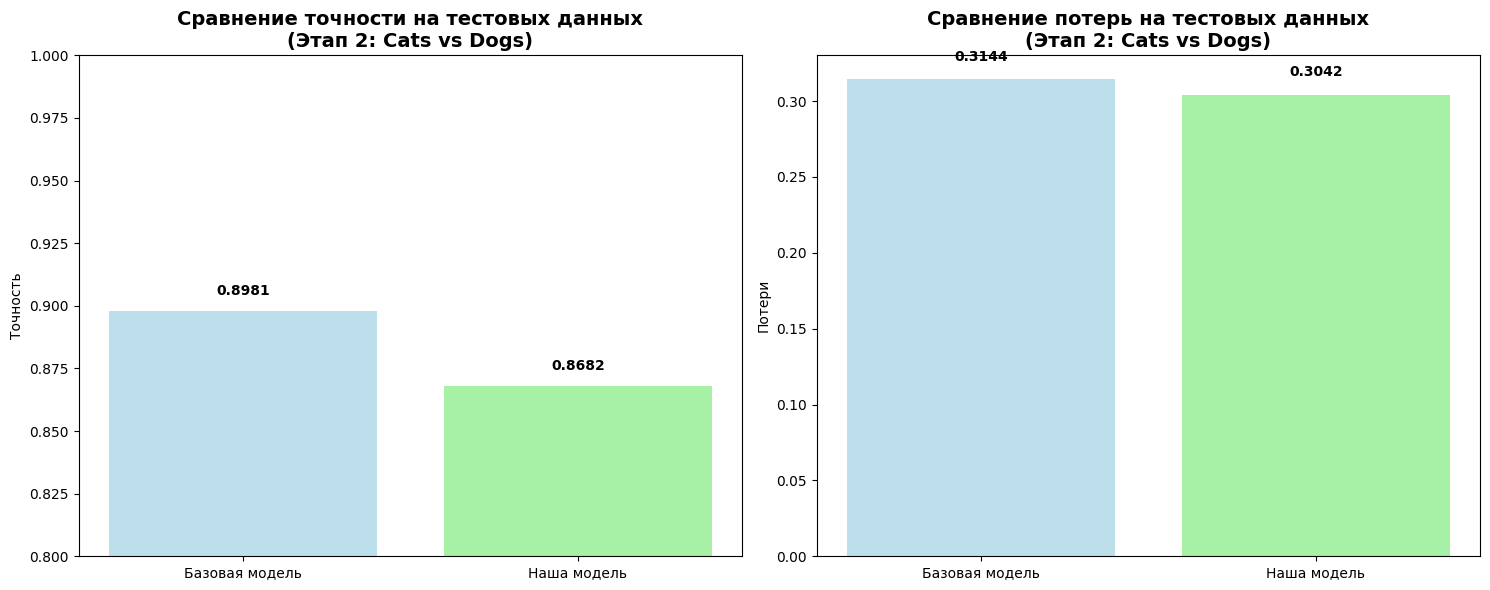

Базовая модель показала лучшие результаты


In [ ]:
# Получаем результаты нашей модели
custom_test_loss, custom_test_accuracy = model_cats_dogs.evaluate(test_dataset_final, verbose=0)

print("\nНАША МОДЕЛЬ (Вариант 20):")
print(f"Размер изображения: 220x220")
print(f"Архитектура: 4 сверт. слоев, фильтры [32, 32, 64, 128]")
print(f"Ядро свертки: 5x5")
print(f"Скрытые слои: 1 слоя с 512 нейронами")
print(f"Точность на тесте: {custom_test_accuracy:.4f}")
print(f"Потери на тесте: {custom_test_loss:.4f}")

print("\nБАЗОВАЯ МОДЕЛЬ:")
print(f"Размер изображения: 150x150")
print(f"Архитектура: 4 сверт. слоя, фильтры [32, 64, 128, 128]")
print(f"Ядро свертки: 3x3")
print(f"Скрытые слои: 1 слой с 512 нейронами")
print(f"Точность на тесте: {base_test_accuracy:.4f}")
print(f"Потери на тесте: {base_test_loss:.4f}")

accuracy_diff = custom_test_accuracy - base_test_accuracy
loss_diff = base_test_loss - custom_test_loss

# Визуализация сравнения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Сравнение точности
models = ['Базовая модель', 'Наша модель']
accuracies = [base_test_accuracy, custom_test_accuracy]
losses = [base_test_loss, custom_test_loss]

bars1 = ax1.bar(models, accuracies, color=['lightblue', 'lightgreen'], alpha=0.8)
ax1.set_title('Сравнение точности на тестовых данных\n(Этап 2: Cats vs Dogs)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Точность')
ax1.set_ylim(0.8, 1.0)

for bar, acc in zip(bars1, accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Сравнение потерь
bars2 = ax2.bar(models, losses, color=['lightblue', 'lightgreen'], alpha=0.8)
ax2.set_title('Сравнение потерь на тестовых данных\n(Этап 2: Cats vs Dogs)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Потери')

for bar, loss in zip(bars2, losses):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{loss:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Анализ эффективности
if accuracy_diff > 0:
    improvement_percent = (accuracy_diff / base_test_accuracy) * 100
    print(f"Наша модель улучшила точность на {improvement_percent:.2f}%")
else:
    print("Базовая модель показала лучшие результаты")

## Этап 3. Использование предварительно обученной сети
Использование
предварительно обученной на наборе ImageNet нейронной сети VGG19 для увеличения точности классификации
изображений из набора данных Cats vs. Dogs.

### Загрузка и использование предобученной модели VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

# Параметры согласно варианту 20
# Заморозка всей сверточной основы за исключением последнего сверточного блока и обучение сети совместно с классификатором, 60 эпох

print("Загрузка предобученной модели VGG19...")

# Загрузка VGG19 без верхних слоев (без классификатора)
base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(220, 220, 3)
)

print("Базовая модель VGG19 загружена!")
print(f"Количество слоев в VGG19: {len(base_model.layers)}")

Загрузка предобученной модели VGG19...
Базовая модель VGG19 загружена!
Количество слоев в VGG19: 22


In [ ]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 220, 220, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 220, 220, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 220, 220, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 110, 110, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 110, 110, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 55, 55, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 55, 55, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 55, 55, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 55, 55, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 55, 55, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 27, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 27, 27, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 27, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 27, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 27, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 13, 13, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 13, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 13, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 13, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 13, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Функция предобработки для VGG19
def preprocess_vgg(image, label):
    image = tf.image.resize(image, [220, 220])
    image = preprocess_input(image)
    return image, label

# Создание датасетов
train_vgg_dataset = raw_train_final.map(preprocess_vgg).batch(32).prefetch(tf.data.AUTOTUNE)
val_vgg_dataset = raw_val_final.map(preprocess_vgg).batch(32).prefetch(tf.data.AUTOTUNE)
test_vgg_dataset = raw_test.map(preprocess_vgg).batch(32).prefetch(tf.data.AUTOTUNE)

print("Датасеты для VGG19 подготовлены!")
print(f"Обучающая выборка: {len(list(raw_train_final))} изображений")
print(f"Валидационная выборка: {len(list(raw_val_final))} изображений")
print(f"Тестовая выборка: {len(list(raw_test))} изображений")

Датасеты для VGG19 подготовлены!
Обучающая выборка: 13026 изображений
Валидационная выборка: 3257 изображений
Тестовая выборка: 6979 изображений


In [ ]:
# В VGG19 последний сверточный блок - это блок 'block5'
for layer in base_model.layers:
    if not layer.name.startswith('block5'):
        layer.trainable = False
    else:
        layer.trainable = True

print("Слои заморожены/разморожены:")
trainable_count = sum([layer.trainable for layer in base_model.layers])
print(f"Всего слоев: {len(base_model.layers)}")
print(f"Обучаемых слоев: {trainable_count}")
print(f"Замороженных слоев: {len(base_model.layers) - trainable_count}")

Слои заморожены/разморожены:
Всего слоев: 22
Обучаемых слоев: 5
Замороженных слоев: 17


In [ ]:
# Создание полной модели
model_vgg = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),  # Согласно варианту 20
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model_vgg.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nАрхитектура полной модели с VGG19:")
model_vgg.summary()


Архитектура полной модели с VGG19:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 6, 6, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,287,553 (77.39 MB)

 Trainable params: 9,702,401 (37.01 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

In [ ]:
vgg_early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

vgg_reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

In [ ]:
# Обучение модели
print("Начало обучения модели с VGG19...")
print("Стратегия: Заморозка всех слоев кроме block5 + обучение классификатора")
print("Количество эпох: 60 (с ранней остановкой)")

history_vgg = model_vgg.fit(
    train_vgg_dataset,
    epochs=60,
    validation_data=val_vgg_dataset,
    callbacks=[vgg_early_stopping, vgg_reduce_lr],
    verbose=1
)

Начало обучения модели с VGG19...
Стратегия: Заморозка всех слоев кроме block5 + обучение классификатора
Количество эпох: 60 (с ранней остановкой)
Epoch 1/60
408/408 ━━━━━━━━━━━━━━━━━━━━ 150s 352ms/step - accuracy: 0.9391 - loss: 0.1915 - val_accuracy: 0.9813 - val_loss: 0.0456 - learning_rate: 1.0000e-04
Epoch 2/60
408/408 ━━━━━━━━━━━━━━━━━━━━ 140s 343ms/step - accuracy: 0.9819 - loss: 0.0467 - val_accuracy: 0.9859 - val_loss: 0.0386 - learning_rate: 1.0000e-04
Epoch 3/60
408/408 ━━━━━━━━━━━━━━━━━━━━ 140s 342ms/step - accuracy: 0.9882 - loss: 0.0362 - val_accuracy: 0.9770 - val_loss: 0.0711 - learning_rate: 1.0000e-04
Epoch 4/60
408/408 ━━━━━━━━━━━━━━━━━━━━ 140s 342ms/step - accuracy: 0.9873 - loss: 0.0373 - val_accuracy: 0.9859 - val_loss: 0.0446 - learning_rate: 1.0000e-04
Epoch 5/60
408/408 ━━━━━━━━━━━━━━━━━━━━ 139s 340ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9736 - val_loss: 0.0787 - learning_rate: 1.0000e-04
Epoch 6/60
408/408 ━━━━━━━━━━━━━━━━━━━━ 140s 342ms/st

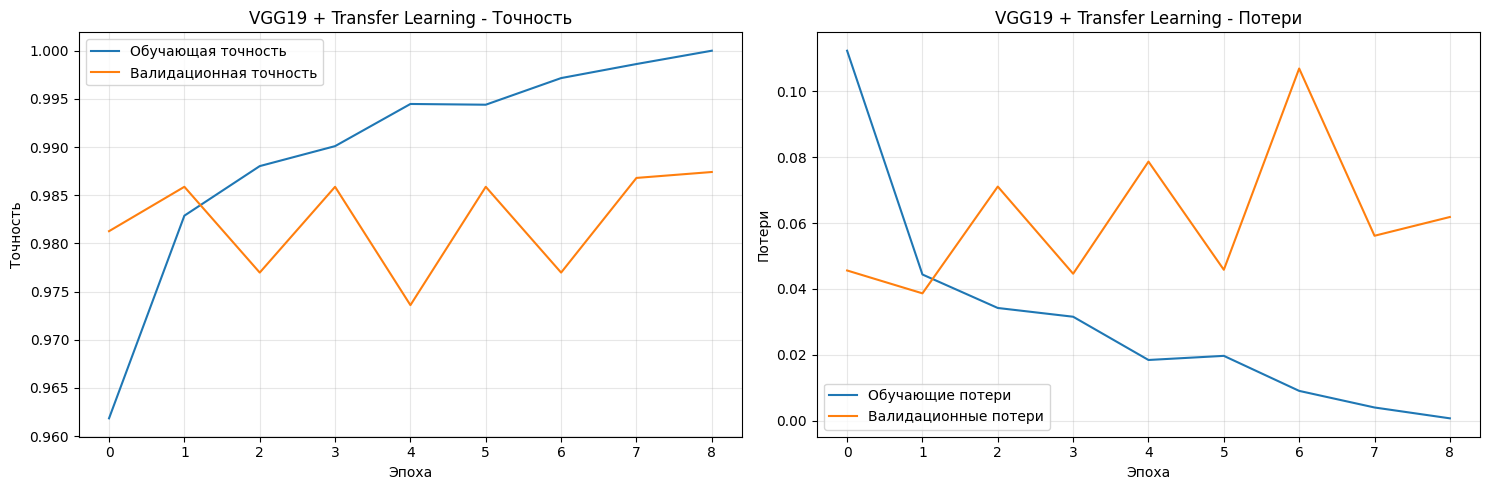

In [ ]:
# Графики обучения
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Обучающая точность')
plt.plot(history_vgg.history['val_accuracy'], label='Валидационная точность')
plt.title('VGG19 + Transfer Learning - Точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Обучающие потери')
plt.plot(history_vgg.history['val_loss'], label='Валидационные потери')
plt.title('VGG19 + Transfer Learning - Потери')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
vgg_test_loss, vgg_test_accuracy = model_vgg.evaluate(test_vgg_dataset, verbose=0)

print(f"Точность на тестовых данных: {vgg_test_accuracy:.4f}")
print(f"Потери на тестовых данных: {vgg_test_loss:.4f}")

Точность на тестовых данных: 0.9847
Потери на тестовых данных: 0.0454


Батч 1:
  Точность: 93.75% (30/32)
Батч 2:
  Точность: 100.00% (32/32)
Батч 3:
  Точность: 100.00% (32/32)

Общая статистика по 3 батчам:
Общая точность: 97.92%
Средняя точность по батчам: 97.92%
Количество проанализированных изображений: 96

Статистика уверенности:
Средняя уверенность: 0.988
Медианная уверенность: 1.000
Минимальная уверенность: 0.624
Максимальная уверенность: 1.000


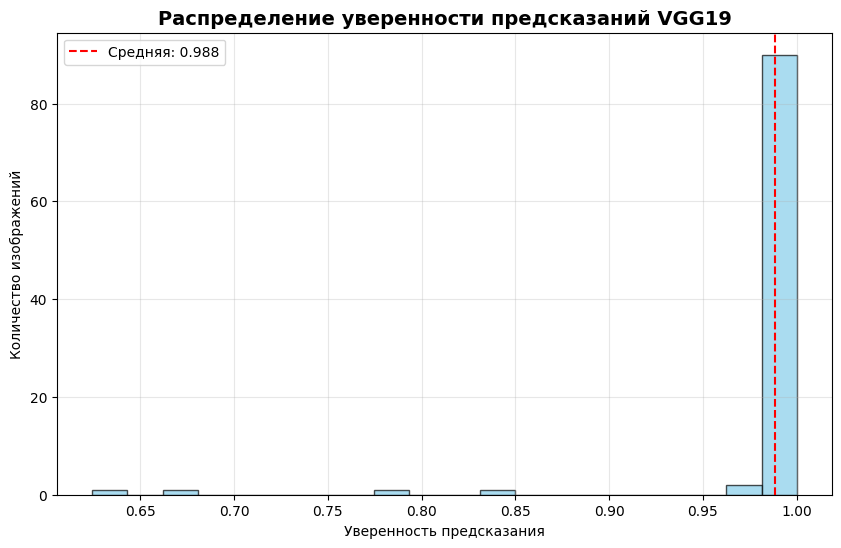

In [ ]:
# Детальная статистика

def detailed_predictions_analysis(model, dataset, num_batches=5):
    """Анализ предсказаний на нескольких батчах"""

    all_predictions = []
    all_true_labels = []
    batch_accuracies = []

    for batch_num, (images, labels) in enumerate(dataset.take(num_batches)):
        predictions = model.predict(images, verbose=0)
        predictions = predictions.flatten()

        correct_predictions = sum(1 for true, pred in zip(labels, predictions)
                                if (pred > 0.5) == (true == 1))
        batch_accuracy = correct_predictions / len(labels)
        batch_accuracies.append(batch_accuracy)

        print(f"Батч {batch_num + 1}:")
        print(f"  Точность: {batch_accuracy:.2%} ({correct_predictions}/{len(labels)})")

        all_predictions.extend(predictions)
        all_true_labels.extend(labels.numpy())

    binary_predictions = [1 if pred > 0.5 else 0 for pred in all_predictions]
    overall_accuracy = sum(1 for true, pred in zip(all_true_labels, binary_predictions)
                          if true == pred) / len(all_true_labels)

    print(f"\nОбщая статистика по {num_batches} батчам:")
    print(f"Общая точность: {overall_accuracy:.2%}")
    print(f"Средняя точность по батчам: {np.mean(batch_accuracies):.2%}")
    print(f"Количество проанализированных изображений: {len(all_true_labels)}")

    confidences = [pred if pred > 0.5 else 1-pred for pred in all_predictions]
    print(f"\nСтатистика уверенности:")
    print(f"Средняя уверенность: {np.mean(confidences):.3f}")
    print(f"Медианная уверенность: {np.median(confidences):.3f}")
    print(f"Минимальная уверенность: {np.min(confidences):.3f}")
    print(f"Максимальная уверенность: {np.max(confidences):.3f}")

    plt.figure(figsize=(10, 6))
    plt.hist(confidences, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(x=np.mean(confidences), color='red', linestyle='--',
                label=f'Средняя: {np.mean(confidences):.3f}')
    plt.title('Распределение уверенности предсказаний VGG19', fontsize=14, fontweight='bold')
    plt.xlabel('Уверенность предсказания')
    plt.ylabel('Количество изображений')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return overall_accuracy

detailed_accuracy = detailed_predictions_analysis(model_vgg, test_vgg_dataset, num_batches=3)

### Сравнение результатов 2 и 3 этапа

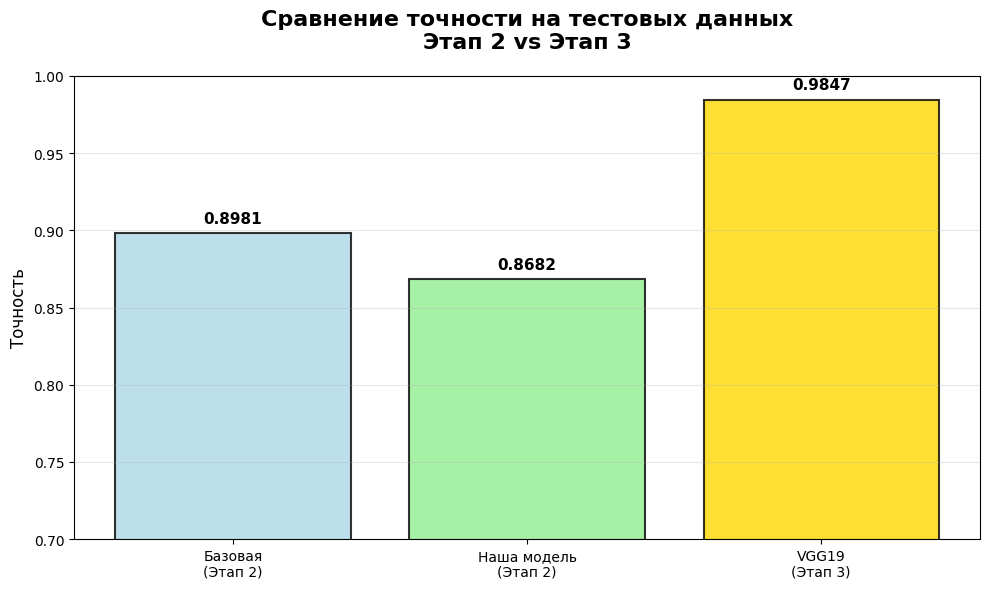

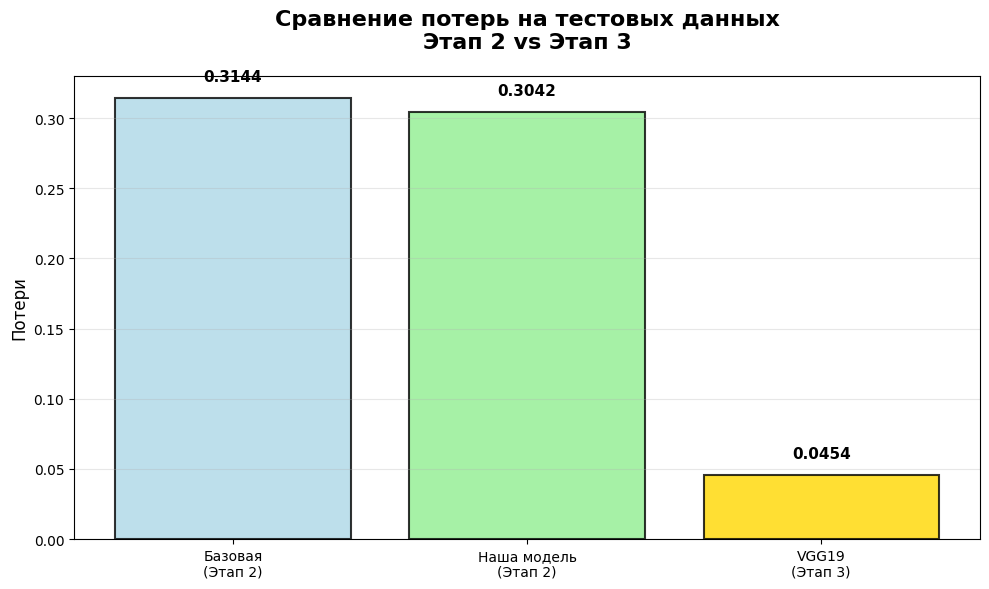

ЧИСЛЕННЫЕ РЕЗУЛЬТАТЫ СРАВНЕНИЯ
Модель               Точность   Потери    
------------------------------------------------------------
Базовая              0.8981     0.3144    
Наша модель          0.8682     0.3042    
VGG19                0.9847     0.0454    


In [ ]:
# Получаем результаты всех моделей
custom_test_loss, custom_test_accuracy = model_cats_dogs.evaluate(test_dataset_final, verbose=0)
base_test_loss, base_test_accuracy = base_model_cats_dogs.evaluate(base_test_dataset, verbose=0)
vgg_test_loss, vgg_test_accuracy = model_vgg.evaluate(test_vgg_dataset, verbose=0)

models = ['Базовая\n(Этап 2)', 'Наша модель\n(Этап 2)', 'VGG19\n(Этап 3)']
accuracies = [base_test_accuracy, custom_test_accuracy, vgg_test_accuracy]
losses = [base_test_loss, custom_test_loss, vgg_test_loss]
colors = ['lightblue', 'lightgreen', 'gold']

# График 1: Сравнение точности
plt.figure(figsize=(10, 6))
bars1 = plt.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
plt.title('Сравнение точности на тестовых данных\nЭтап 2 vs Этап 3', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Точность', fontsize=12)
plt.ylim(0.7, 1.0)
plt.grid(True, alpha=0.3, axis='y')

for bar, acc in zip(bars1, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{acc:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# График 2: Сравнение потерь
plt.figure(figsize=(10, 6))
bars2 = plt.bar(models, losses, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
plt.title('Сравнение потерь на тестовых данных\nЭтап 2 vs Этап 3', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Потери', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

for bar, loss in zip(bars2, losses):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{loss:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("=" * 60)
print("ЧИСЛЕННЫЕ РЕЗУЛЬТАТЫ СРАВНЕНИЯ")
print("=" * 60)
print(f"{'Модель':<20} {'Точность':<10} {'Потери':<10}")
print("-" * 60)
print(f"{'Базовая':<20} {base_test_accuracy:<10.4f} {base_test_loss:<10.4f}")
print(f"{'Наша модель':<20} {custom_test_accuracy:<10.4f} {custom_test_loss:<10.4f}")
print(f"{'VGG19':<20} {vgg_test_accuracy:<10.4f} {vgg_test_loss:<10.4f}")